In [1]:
#导入第三方库
import os
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
#设置中文编码和负号的正常显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [ ]:
df = pd.read_csv('手机销售分布分析.csv')#,encoding='utf8'
df.head()
# 1.创建Python代码，导入数据后展示数据的完整信息（2分）
df.info()

In [3]:
# 2.完成对数据清洗，根据Start_tim字段新增每月，每日，每周，每小时列，用来对每条记录进行更为细粒度的刻画。(3分)
df['start_time'] = df['start_time'].astype('datetime64')
df['month'] = df['start_time'].dt.month
df['day'] = df['start_time'].dt.day
df['weekday'] = df['start_time'].dt.dayofweek
df['hour'] = df['start_time'].dt.hour

In [4]:
# 3.统计出空值的记录数，将所有为的空字段替换成0（或null），显示出来空字段的个数，并对所有重复的记录去重输出数据（5分）
df.fillna('null',inplace=True)
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [69]:
# 4.根据拿到的数据信息统计出各个省份不同性别的订单总数量，并且使用可视化工具生成各个省份不同性别的消费总数量的折线图（用虚线表示线条），并设置图像标题，图像标签,图像图例，图像的X轴标签，图像的y轴标签。（解决中文乱码问题）并形成分析结论（8分）
result = df.groupby(['province','sex'])['oid'].nunique()
r1 = result.reset_index()
# 方式一： 分别画出男女折现图
# r_m = r1[r1['sex']=='男']
# r_f = r1[r1['sex']=='女']
# plt.plot(r_m['province'],r_m['oid'])
# plt.plot(r_f['province'],r_f['oid'])
# plt.show()
# 方式二：将省份 作为 行索引 ，性别（男女）作为列索引 DataFrame
r2 = r1.pivot_table(index='province',columns='sex',values='oid')
r2.plot(linestyle='--')
plt.title('省份性别订单数')
plt.legend()
plt.xlabel('省份')
plt.ylabel('订单数')
plt.show()
# 结论： 不同省份男女消费相当，广东、上海高于其他省份

<AxesSubplot:xlabel='month'>

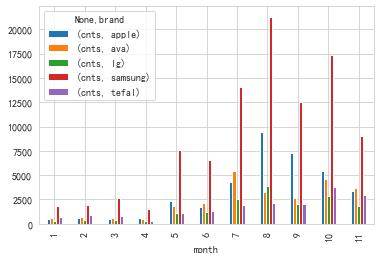

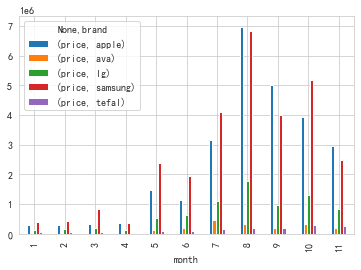

In [96]:
# 5.统计每月用户不同喜好的购买数量和总金额，并生成不同品牌的购买数量和总金额的柱形图，柱形图填充颜色为红色，边框颜色为黑色，添加图例（向左偏移），标签（解决中文乱码问题）并形成分析结论（8分）
bdf = df[df['brand'] != 'null']
top5brands = bdf['brand'].value_counts().head(5)
bdf = bdf[bdf['brand'].isin(top5brands.index)]

r1 = bdf.groupby(['month'])['brand'].value_counts()
r2 = bdf.groupby(['month','brand'])['price'].sum()
r1.to_frame().rename(columns={'brand':'cnts'}).pivot_table(index='month',columns='brand').plot.bar()
r2.to_frame().pivot_table(index='month',columns='brand').plot.bar()

In [62]:
'''
data = {'A': ['foo', 'bar', 'baz', 'foo', 'bar', 'baz'],
        'B': [1, 2, 3, 4, 5, 6],
        'C': [2.0, 3.0, 4.0, 5.0, 6.0, 7.0]}
df = pd.DataFrame(data)
df
topn = 1
result = df.groupby('A').apply(lambda x: x.nlargest(topn, 'C'))

r1top5 = r1.groupby('month').apply(lambda x: x.head(5))
'''

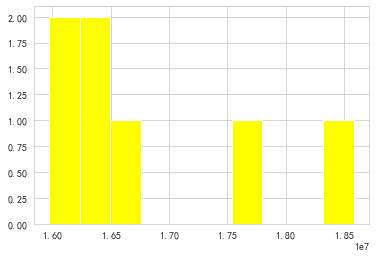

In [109]:
# 6.求出不同星期的客单价，并在界面上使用图像可视化工具生成不同星期的消费情况的直方图，图像填充颜色为黄色，并解释x轴刻度，根据自己对业务指标的分析得出相应的结论，并做出解答。（客单价=总金额/总人数）（解决中文乱码问题）（8分）
sumdf = df.groupby('weekday')['price'].sum()
nuiddf = df.groupby('weekday')['uid'].nunique()
result = sumdf/nuiddf
result.plot.bar()
plt.show()
plt.hist(result.values,color='yellow')
plt.show()
# x轴：代表客单价，y轴代表 星期几的个数,例如：客单价为1.6有两天

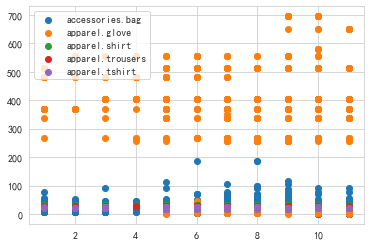

In [5]:
# 7.使用Matplotlib绘制不同性别在时间维度上，对不同商品品类的支付金额分布，并形成分析结论（8分）
# df['type'].value_counts() 124个品类

'''
tdf = pd.DataFrame([[1,'A',20],[1,'A',50],[1,'B',20],
                    [2,'A',20],[2,'B',70],[2,'B',20]],columns=['month','type','price'])
tr1 = tdf.pivot_table(index='month',columns='type',values='price')
tr1
plt.scatter(x=tr1.index,y=tr1['A'])
plt.scatter(x=tr1.index,y=tr1['B'])
'''
tdf = df[df['type'] != 'null']

tr1 = tdf[tdf['sex']=='女']#.groupby(['month','type'])['price'].sum()
#因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
tr11 = tr1.reset_index()
tr11_1 = tr11[tr11['type']=='accessories.bag']
plt.scatter(tr11_1['month'],tr11_1['price'],label='accessories.bag')
tr11_2 = tr11[tr11['type']=='apparel.glove']
plt.scatter(tr11_2['month'],tr11_2['price'],label='apparel.glove')
tr11_3 = tr11[tr11['type']=='apparel.shirt']
plt.scatter(tr11_3['month'],tr11_3['price'],label='apparel.shirt')
tr11_4 = tr11[tr11['type']=='apparel.trousers']
plt.scatter(tr11_4['month'],tr11_4['price'],label='apparel.trousers')
tr11_5 = tr11[tr11['type']=='apparel.tshirt']
plt.scatter(tr11_5['month'],tr11_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()
tr1 = tdf[tdf['sex']=='男']#.groupby(['month','type'])['price'].sum()
tr11 = tr1.reset_index()
tr11_1 = tr11[tr11['type']=='accessories.bag']
plt.scatter(tr11_1['month'],tr11_1['price'],label='accessories.bag')
tr11_2 = tr11[tr11['type']=='apparel.glove']
plt.scatter(tr11_2['month'],tr11_2['price'],label='apparel.glove')
tr11_3 = tr11[tr11['type']=='apparel.shirt']
plt.scatter(tr11_3['month'],tr11_3['price'],label='apparel.shirt')
tr11_4 = tr11[tr11['type']=='apparel.trousers']
plt.scatter(tr11_4['month'],tr11_4['price'],label='apparel.trousers')
tr11_5 = tr11[tr11['type']=='apparel.tshirt']
plt.scatter(tr11_5['month'],tr11_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()

5              furniture.kitchen.table
6               electronics.smartphone
10    appliances.kitchen.refrigerators
11          appliances.personal.scales
30           appliances.kitchen.kettle
32         computers.components.memory
Name: type, dtype: object
RangeIndex(start=0, stop=6, step=1)


<ipython-input-47-74dbd067dc20>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y1.values)


[Text(-1.0, 0, 'furniture.kitchen.table'),
 Text(0.0, 0, 'electronics.smartphone'),
 Text(1.0, 0, 'appliances.kitchen.refrigerators'),
 Text(2.0, 0, 'appliances.personal.scales'),
 Text(3.0, 0, 'appliances.kitchen.kettle'),
 Text(4.0, 0, 'computers.components.memory'),
 Text(5.0, 0, ''),
 Text(6.0, 0, '')]

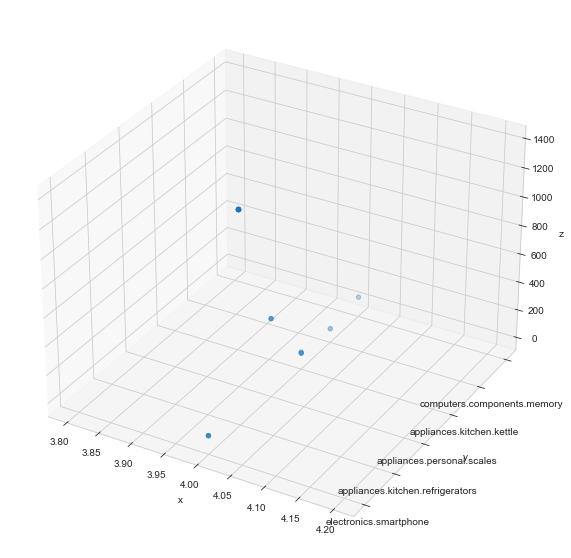

In [47]:
tr1 = tr1.head(20)
x = tr1['month'].values
y = tr1['type'].values #[a, b ,b ,b, c,d]
z = tr1['price'].values

y1 = tr1['type'].drop_duplicates()
print(y1)
y11 = y1.reset_index()
yy = []
for i in y:
    yy.append(y11[y11['type']==i].index[0])
    
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,yy,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
print(y11.index)
ax.set_yticklabels(y1.values)

In [11]:
# 8.使用Matplotlib绘制不同城市不同人群在商品品类的渗透率(渗透率=该城市该人群购物总额/商品总付款额)，并形成分析结论（8分）
sprice = df.groupby(['province','type'])['price'].sum()
mprice = df[df['sex']=='男'].groupby(['province','type'])['price'].sum()
fprice = df[df['sex']=='女'].groupby(['province','type'])['price'].sum()

province  type                
上海        accessories.bag          5281.81
          accessories.umbrella      280.00
          apparel.glove           73967.61
          apparel.shirt             259.04
          apparel.shoes             411.53
                                    ...   
重庆        sport.trainer             673.49
          stationery.battery        760.97
          stationery.cartrige       895.76
          stationery.paper          143.58
          stationery.stapler        222.00
Name: price, Length: 1224, dtype: float64

In [16]:
mdf = mprice/sprice
mdf = mdf.reset_index()
#因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
mdf_1 = mdf[mdf['type']=='accessories.bag']
mdf_2 = mdf[mdf['type']=='apparel.glove']
mdf_3 = mdf[mdf['type']=='apparel.shirt']
mdf_4 = mdf[mdf['type']=='apparel.trousers']
mdf_5 = mdf[mdf['type']=='apparel.tshirt']
plt.plot(mdf_1['province'],mdf_1['price'],label='accessories.bag')
plt.plot(mdf_2['province'],mdf_2['price'],label='apparel.glove')
plt.plot(mdf_3['province'],mdf_3['price'],label='apparel.shirt')
plt.plot(mdf_4['province'],mdf_4['price'],label='apparel.trousers')
plt.plot(mdf_5['province'],mdf_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()

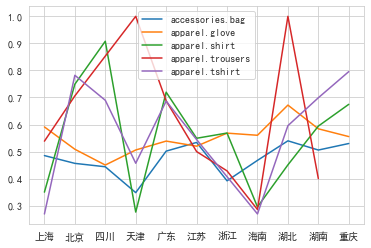

In [17]:
mdf = fprice/sprice
mdf = mdf.reset_index()
#因为品牌有120多个，挑选5个来展示 accessories.bag apparel.glove apparel.shirt apparel.trousers apparel.tshirt
mdf_1 = mdf[mdf['type']=='accessories.bag']
mdf_2 = mdf[mdf['type']=='apparel.glove']
mdf_3 = mdf[mdf['type']=='apparel.shirt']
mdf_4 = mdf[mdf['type']=='apparel.trousers']
mdf_5 = mdf[mdf['type']=='apparel.tshirt']
plt.plot(mdf_1['province'],mdf_1['price'],label='accessories.bag')
plt.plot(mdf_2['province'],mdf_2['price'],label='apparel.glove')
plt.plot(mdf_3['province'],mdf_3['price'],label='apparel.shirt')
plt.plot(mdf_4['province'],mdf_4['price'],label='apparel.trousers')
plt.plot(mdf_5['province'],mdf_5['price'],label='apparel.tshirt')
plt.legend()
plt.show()